## $0-1 \ \ Integer \ \ Programming$

Given a set of $n$ items $\left\{ e_1, e_2, \cdots , e_n \right\},$ with weights $\left\{ w_1, w_2, \cdots , w_n \right\},$ and values $\left\{ v_1, v_2, \cdots , v_n \right\},$ determine which items to include in the collection so that the total weight is less than or equal to a given limit $W_{max}$ and the total value $V_{Bag}$ is as large as possible.

### $Example$
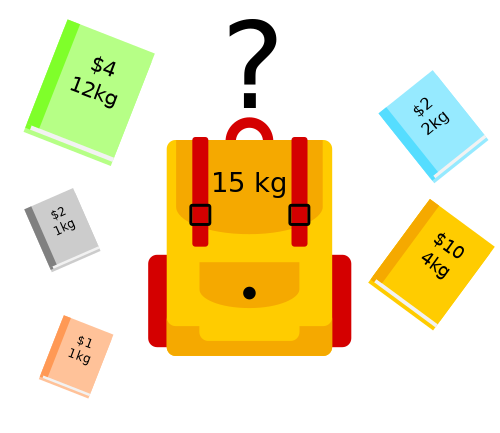



Example of a one-dimensional (constraint) knapsack problem: which books should be chosen to maximize the amount of money while still keeping the overall weight under or equal to 15 kg? A multiple constrained problem could consider both the weight and volume of the books.
(Solution: if any number of each book is available, then three yellow books and three grey books; if only the shown books are available, then all except for the green book.)

In [1]:
# @title $0-1 \ \ Knapsack \ \ Problem$
# @markdown The most common problem being solved is the 0-1 knapsack problem, which restricts the number \
# @markdown $x_i$ of copies of each kind of item to $zero$ or $one$. Given a set of $n$ items numbered from $1$ up to $n$ \
# @markdown each with a weight $w_i$ and a value $v_i$, along with a maximum weight capacity $W.$
from IPython.display import HTML, Math, display
import sympy as sp
import numpy as np
import random


def item_print(items, i,j):
    expr = r'\left\{ '
    for k in range(i,j-1):
        expr = expr + r'e_{' + sp.latex(k) + r'},'

    k = j-1
    expr = expr + r'e_{' + sp.latex(k) + r'}'
    expr = expr + r'\right\}'

    return expr


display(Math(r'\displaystyle Maximize \ \ \sum_{i=1}^{n}{v_i x_i}'))
display(Math(r'\displaystyle Subject \ \ to \ \ \sum_{i=1}^{n}{w_i x_i} \leq W \ \ and \ \ x_i \in \ \ \left\{0,1\right\}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [25]:
# @title $weights \ \ and \ \ values \ \ of \ \ items$
mode = "random" # @param ["manual", "random"]

if(mode == "manual"):
    check=0
    while(check==0):
        W0=[int(i) for i in input("Enter the weights seperated by ',' : W = ").split(',')]   #Weights
        V0=[sp.Rational(i) for i in input("Enter the values seperated by ',' : V = ").split(',')]    #Values

        if(len(W0)==len(V0)):
            check=1
        else:
            check=0
        if(len(W0)!=len(set(W0))):
            print('please avoid repetition of weights')
            check=0

        if((0 in W0) and V0[W0.index(0)] !=0 ):
            if(V0[W0.index(0)]==0):
                print('weight of first item is zero but its value is', V0[0])
                check=0
            elif(V0[W0.index(0)]==1):
                print('weight of second item is zero but its value is', V0[1])
                check=0
            elif(V0[W0.index(0)]==2):
                print('weight of third item is zero but its value is', V0[2])
                check=0
            else:
                print('weight of ',(W0.index(0)+1),'th item is zero but its value is ', V0[W0.index(0)], sep='')
                check=0

else:
    check=0
    while(check==0):
        try:
            n = int(input('number of items = '))
            if(n <= 0):
                print('Please enter positive integer')
                check=0
            else:
                check = 1
        except:
            print('Please enter positive integer')
            check=0

    W0 = list(random.sample(range(1,2*n),n))
    V0 = list(np.random.randint(1,2*n,n))
    print('weights =',W0)
    print('values =',V0)







number of items = 5
weights = [7, 1, 2, 4, 9]
values = [3, 4, 3, 8, 9]


In [26]:
# @title $maximum \ \ weight \ \ knapsack \ \ can \ \ carry$
if(0 not in W0):
    W0.append(0)
    V0.append(0)
    #display(Math(r'first \ \ we \ \ will \ \ add \ \ an \ \ item0 \ \ with \ weight \ \ as \ \ well \ \ as \ \ value \ \ equals \ \ to \ \ zero'))
    #print('first we will add')

check=0
while(check==0):
    try:
        C = int(input('Maximum weight : '))
        print()

        if(C >= 0):
            check=1
        else:
            print('Maximum weight cannot be negative!')
            check=0
    except:
        print('Please enter only non-negative integer weight')


display(Math(r'add \ \ 0^{th} \ \ item \ \ e_0 \ \ in \ \ list \ \ with \ \ weight \ \ w_0=0 \ \ and \ \ value \ \ v_0=0 '))
W_V = {} # Dictionary for weights and values
for i in range(len(W0)):
    W_V[W0[i]]=V0[i]
W_V

W = sorted(W0)
display(Math(r'now \ \ sort \ \ the \ \ items \ \ with \ \ ascending \ \ weights'))
V = [W_V[i] for i in W]
n = len(W)
items = [('e'+str(i)) for i in range (n)]
display(Math(r'items='+ item_print(items, 0,n)))
display(Math(r'weights='+sp.latex(W)))
display(Math(r'values='+sp.latex(V)))



#Meaning of Notation M[i,j]
print()
display(Math(r'M[i,j] : \ Maximum \ \ value \ \ for \ \ first \ \ i \ \ items \ \ (e_1 \ \ to \ \ e_i) \ \ with \ \ maximum \ \ allowed \ \ weight \ \ is \ \ j'))

Maximum weight : 12



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [27]:
# @title $Dynamic \ \ Programming \ \ Method \ \ (Detailed)$

M = np.zeros((n,C+1))
if(True):
    for i in range(1,n):
        if(i==1):
            display(Math(r'Weight \ \ and \ \ value \ \ of \ \ first \ \ item'.format(i)))
        else:
            display(Math(r'Weight \ \ of \ \ first \ \ {} \ \ items \ \ and \ \ their \ \ values'.format(i)))

        display(Math(r'items ='+item_print(items, 1,i+1)))
        display(Math(r'weights ='+sp.latex(W[1:i+1])))
        display(Math(r'values ='+sp.latex(V[1:i+1])))
        print()
        for j in range(1,C+1):
            display(Math(r'{\color{Red}{Calculations \ \ for \ \ M['+ sp.latex(i) +r','+ sp.latex(j) +r']}}'))
            display(Math(r'for \ \ e_{'+sp.latex(i)+r'}, \ \ w_{'+sp.latex(i)+r'}='+sp.latex(W[i])+r' \ \ and \ \ v_{'+sp.latex(i)+r'}='+sp.latex(V[i])))
            if(i==1):
                display(Math(r'\ \ \ \ \ \ If \ \ there \ \ is \ \ only \ \ first \ \  item \ \ ' + item_print(items, 1,i+1) + r' \ \ and \ \ maximum \ \ allowed \ \ weight \ \ W_{max}=' + sp.latex(j)))
            else:
                display(Math(r'\ \ \ \ \ \ If \ \ there \ \ are \ \ only \ \ first \ \ '+sp.latex(i)+' \ \ items \ \ ' + item_print(items, 1,i+1) + r' \ \ and \ \ maximum \ \ allowed \ \ weight \ \ W_{max}=' + sp.latex(j)))

            if(j >= W[i]):
                display(Math(r'\ \ \ \ \ \ as \ \ W_{max} \geq w_{' + sp.latex(i) +r'}(=' +sp.latex(W[i])+ r')'))
                display(Math(r'\ \ \ \ \ \ \therefore \ if \ \ we \ \ put \ \ e_{} \ \ in \ \ the \ \ Knapsack, W_{} = {} \ ; \ V_{} = {}'.format(i,'{Bag}',W[i],'{Bag}',V[i])))
                alpha = V[i]

                display(Math(r'\ \ \ \ \ \ now \ \ remaining \ \ allowed \ \ weight: W_{} = W_{} - W_{} = {}'.format('{Rmax}','{max}','{Bag}',j-W[i])))
                display(Math(r'\ \ \ \ \ \ and \ \ maximum \ \ value \ \ with \ \ first \ \ ' +sp.latex(i-1)+ ' \ \ items \ \ and \ \ weight \ \ atmost \ \ '
                            +sp.latex(j-W[i])+ r' \ \ is \ \ M['+sp.latex(i-1)+r',' + sp.latex(j-W[i]) +r']'))
                display(Math(r'\ \ \ \ \ \ V_{} = M[{},{}]={}'.format('{Rmax}',i-1,j-W[i],M[i-1,j-W[i]])))
                beta = M[i-1,j-W[i]]

                gamma = alpha + beta
                if(gamma > M[i-1,j]):
                    display(Math(r'\ \ \ \ \ \ as \ \ V_{}+V_{} > M[{},{}](={}), \ \ we \ \ will \ \ put \ \ item \ \ e_{} \ \ in \ \ the \ \ knapsack'.format('{Bag}','{Rmax}',i-1,j,M[i-1,j-1],i)))
                    display(Math(r'\ \ \ \ \ \ \therefore \ M[{},{}]=V_{}+V_{}={}+{}={}'.format(i,j,'{Bag}','{Rmax}',alpha, beta,sp.latex(gamma))))
                    M[i,j] = gamma
                else:
                    display(Math(r"\ \ \ \ \ \ as \ \ V_{}+V_{} \leq M[{},{}](={}), we \ \ won't \ \ put \ \ item \ \ e_{} \ \ in \ \ the \ \ Knapsack".format('{Bag}','{Rmax}',i-1,j,M[i-1,j],i)))
                    display(Math(r' \ \ \ \ \ \ so, \ \ maximum \ \ value \ \ of \ \ items \ \ in \ \ the \ \ knapsack \ \ will \ \ remain \ \ same \ \ as \ \ that \ \ of \ \ first \ \ '
                            +sp.latex(i-1) + r' \ \ items \ \ and \ \ max \ \ weight \ \ ' + sp.latex(j) + r', \ \ which \ \ is \ \ M['
                            +sp.latex(i-1)+ r',' + sp.latex(j) + r']'))
                    display(Math(r' \ \ \ \ \ \ \ \therefore  \ M[{},{}]=M[{},{}]={}'.format(i,j,i-1,j,M[i-1,j])))
                    M[i,j] = M[i-1,j]

            else:
                display(Math(r' \ \ \ \ \ \ as \ \ W_{max} < w_{' + sp.latex(i) +r"}, \ \ we \ \ can't \ \ put \ \ item \ \ e_{" + sp.latex(i) +
                            r'} \ \ in \ \ the \ \ Knapsack,'))
                display(Math(r' \ \ \ \ \ \ so, \ \ maximum \ \ value \ \ of \ \ items \ \ in \ \ the \ \ knapsack \ \ will \ \ remain \ \ same \ \ as \ \ that \ \ of \ \ first \ \ '
                            +sp.latex(i-1) + r' \ \ items \ \ and \ \ max \ \ weight \ \ ' + sp.latex(j) + r', \ \ which \ \ is \ \ M['
                            +sp.latex(i-1)+ r',' + sp.latex(j) + r']'))
                display(Math(r'\ \ \ \ \ \ \therefore M[{},{}]=M[{},{}]={}'.format(i,j,i-1,j,M[i-1,j])))
                M[i,j] = M[i-1,j]

            print()
            display(Math(r'M=' + sp.latex(sp.Matrix(M))))
            print('-------------------------------------------------------------------------------------------')
        print('-------------------------------------------------------------------------------------------')

else:
    M = np.zeros((n,C+1))
    for i in range(1,n):
        for j in range(1,C+1):
            if(j >= W[i]):
                M[i,j] = max(M[i-1, j] , M[i-1, (j - W[i])]+V[i])
            else:
                M[i,j] = M[i-1,j]
    display(Math(r'M=' + sp.latex(sp.Matrix(M))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------


In [28]:
# @title $Dynamic \ \ Programming \ \ Method \ (for \ \ M[i,j])$

check = 0
while(check==0):
    try:
        row_number = int(input('row number = '))
        if((row_number >= 0) and (row_number <= n)):
            check=1
        else:
           print('enter row number correctly')
           check=0
    except:
        print('enter row number correctly')
        check=0

    try:
        col_number = int(input('column number = '))
        if((col_number >= 0) and (col_number <= C)):
            check=1
        else:
           print('enter column number correctly')
           check=0
    except:
        print('enter column number correctly')
        check=0
print()

M = np.zeros((n,C+1))
if(True):
    M = np.zeros((n,C+1))
    for i in range(1,n):
        for j in range(1,C+1):
            if(i != row_number or j != col_number):
                if(j >= W[i]):
                    M[i,j] = max(M[i-1, j] , M[i-1, (j - W[i])]+V[i])
                else:
                    M[i,j] = M[i-1,j]

            else:
                display(Math(r'M=' + sp.latex(sp.Matrix(M))))
                print()
                if(i == row_number):
                    if(i==1):
                        display(Math(r'Weight \ \ and \ \ value \ \ of \ \ first \ \ item'.format(i)))
                    else:
                        display(Math(r'Weight \ \ of \ \ first \ \ {} \ \ items \ \ and \ \ their \ \ values'.format(i)))

                    display(Math(r'items ='+item_print(items, 1,i+1)))
                    display(Math(r'weights ='+sp.latex(W[1:i+1])))
                    display(Math(r'values ='+sp.latex(V[1:i+1])))
                    print()
                    if(j == col_number):
                        display(Math(r'{\color{Red}{Calculations \ \ for \ \ M['+ sp.latex(i) +r','+ sp.latex(j) +r']}}'))
                        display(Math(r'for \ \ e_{'+sp.latex(i)+r'}, \ \ w_{'+sp.latex(i)+r'}='+sp.latex(W[i])+r' \ \ and \ \ v_{'+sp.latex(i)+r'}='+sp.latex(V[i])))

                        if(i==1):
                            display(Math(r'\ \ \ \ \ \ If \ \ there \ \ is \ \ only \ \ first \ \  item \ \ ' + item_print(items, 1,i+1) + r' \ \ and \ \ maximum \ \ allowed \ \ weight \ \ W_{max}=' + sp.latex(j)))
                        else:
                            display(Math(r'\ \ \ \ \ \ If \ \ there \ \ are \ \ only \ \ first \ \ '+sp.latex(i)+' \ \ items \ \ ' + item_print(items, 1,i+1) + r' \ \ and \ \ maximum \ \ allowed \ \ weight \ \ W_{max}=' + sp.latex(j)))

                        if(j >= W[i]):
                            display(Math(r'\ \ \ \ \ \ as \ \ W_{max} \geq w_{' + sp.latex(i) +r'}(=' +sp.latex(W[i])+ r')'))
                            display(Math(r'\ \ \ \ \ \ \therefore \ if \ \ we \ \ put \ \ e_{} \ \ in \ \ the \ \ Knapsack, W_{} = {} \ ; \ V_{} = {}'.format(i,'{Bag}',W[i],'{Bag}',V[i])))
                            alpha = V[i]

                            display(Math(r'\ \ \ \ \ \ now \ \ remaining \ \ allowed \ \ weight: W_{} = W_{} - W_{} = {}'.format('{Rmax}','{max}','{Bag}',j-W[i])))
                            display(Math(r'\ \ \ \ \ \ and \ \ maximum \ \ value \ \ with \ \ first \ \ ' +sp.latex(i-1)+ ' \ \ items \ \ and \ \ weight \ \ atmost \ \ '
                                        +sp.latex(j-W[i])+ r' \ \ is \ \ M['+sp.latex(i-1)+r',' + sp.latex(j-W[i]) +r']'))
                            display(Math(r'\ \ \ \ \ \ V_{} = M[{},{}]={}'.format('{Rmax}',i-1,j-W[i],M[i-1,j-W[i]])))
                            beta = M[i-1,j-W[i]]

                            gamma = alpha + beta
                            if(gamma > M[i-1,j]):
                                display(Math(r'\ \ \ \ \ \ as \ \ V_{}+V_{} > M[{},{}](={}), \ \ we \ \ will \ \ put \ \ item \ \ e_{} \ \ in \ \ the \ \ knapsack'.format('{Bag}','{Rmax}',i-1,j,M[i-1,j-1],i)))
                                display(Math(r'\ \ \ \ \ \ \therefore \ M[{},{}]=V_{}+V_{}={}+{}={}'.format(i,j,'{Bag}','{Rmax}',alpha, beta,sp.latex(gamma))))
                                M[i,j] = gamma
                            else:
                                display(Math(r"\ \ \ \ \ \ as \ \ V_{}+V_{} \leq M[{},{}](={}), we \ \ won't \ \ put \ \ item \ \ e_{} \ \ in \ \ the \ \ Knapsack".format('{Bag}','{Rmax}',i-1,j,M[i-1,j],i)))
                                display(Math(r' \ \ \ \ \ \ so, \ \ maximum \ \ value \ \ of \ \ items \ \ in \ \ the \ \ knapsack \ \ will \ \ remain \ \ same \ \ as \ \ that \ \ of \ \ first \ \ '
                                        +sp.latex(i-1) + r' \ \ items \ \ and \ \ max \ \ weight \ \ ' + sp.latex(j) + r', \ \ which \ \ is \ \ M['
                                        +sp.latex(i-1)+ r',' + sp.latex(j) + r']'))
                                display(Math(r' \ \ \ \ \ \ \ \therefore  \ M[{},{}]=M[{},{}]={}'.format(i,j,i-1,j,M[i-1,j])))
                                M[i,j] = M[i-1,j]

                        else:
                            display(Math(r' \ \ \ \ \ \ as \ \ W_{max} < w_{' + sp.latex(i) +r"}, \ \ we \ \ can't \ \ put \ \ item \ \ e_{" + sp.latex(i) +
                                        r'} \ \ in \ \ the \ \ Knapsack,'))
                            display(Math(r' \ \ \ \ \ \ so, \ \ maximum \ \ value \ \ of \ \ items \ \ in \ \ the \ \ knapsack \ \ will \ \ remain \ \ same \ \ as \ \ that \ \ of \ \ first \ \ '
                                        +sp.latex(i-1) + r' \ \ items \ \ and \ \ max \ \ weight \ \ ' + sp.latex(j) + r', \ \ which \ \ is \ \ M['
                                        +sp.latex(i-1)+ r',' + sp.latex(j) + r']'))
                            display(Math(r'\ \ \ \ \ \ \therefore M[{},{}]=M[{},{}]={}'.format(i,j,i-1,j,M[i-1,j])))
                            M[i,j] = M[i-1,j]

                        print()
                        display(Math(r'M=' + sp.latex(sp.Matrix(M))))

if(True):
    M = np.zeros((n,C+1))
    for i in range(1,n):
        for j in range(1,C+1):
            if(j >= W[i]):
                M[i,j] = max(M[i-1, j] , M[i-1, (j - W[i])]+V[i])
            else:
                M[i,j] = M[i-1,j]

row number = 3
column number = 7



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [29]:
# @title $whcih \ \ items \ \ to \ \ select \ ?$
import pandas as pd

col_names = [('Wmax = '+str(i)) for i in range(C+1)]
table = pd.DataFrame(M, columns = col_names, index = W, )
table.index.names = ['item weights']
display(table)
print()


display(Math(r'M['+sp.latex(n-1)+r','+sp.latex(C)+r'] = '+sp.latex(M[n-1,C])+r'\ \ \therefore \ \ maximum \ \ value \ \ we \ \ can \ \ get \ \ is \ \ '
             + sp.latex(M[-1,-1])))
print()

avl_value = M[-1,-1]
max_weight = C
index_item_chosen = 0
items_chosen = []
bag_weight = 0
bag_value = 0

row=n-1
col=C
while(avl_value > 0):
    display(Math(r'We \ \ have \ \ to \ \ choose \ \ from \ \ '+sp.latex(row)+r' \ \ items, \ \ with \ \ maximum \ \ weight \ \ '+sp.latex(C-bag_weight)))
    display(Math(r'\ \ \ \ \ \ so \ \ start \ \ from \ \ M[' + sp.latex(row) + r',' + sp.latex(col) + r']'))
    while(M[row-1,col] == M[row,col]):
        display(Math(r'\ \ \ \ \ \ since, \ \ M[' + sp.latex(row) + r',' + sp.latex(col) + r']=M[' + sp.latex(row-1) + r',' + sp.latex(col) +r'],' +
                     r" \ \ we \ \ won't \ \ select \ \ item \ \ e_{" + sp.latex(row) + r'} \ \ ' ))

        row = row - 1

    display(Math(r'\ \ \ \ \ \ as, \ \ M[' + sp.latex(row) + r',' + sp.latex(col) + r'] > M[' + sp.latex(row-1) + r',' + sp.latex(col) +r'],' +
                     r" \ \ we \ \ select \ \ item \ \ e_{" + sp.latex(row) + r'} \ \ ' ))

    index_item_chosen = row
    items_chosen.append(items[row])
    bag_value = bag_value + V[row]
    bag_weight = bag_weight + W[row]
    display(Math(r'\ \ \ \ \ \ \therefore \ \ weight \ \ of \ \ knapsack \ \ is \ \ ' + sp.latex(bag_weight) +r'\ \ and \ \ value \ \ is \ \ '
                 + sp.latex(bag_value)))
    avl_value = M[-1,-1] - bag_value
    row = row - 1
    col = C - bag_weight
    print()

display(Math(r'finally \ \ the \ \ items \ \ chosen \ \ are \ \ ' + sp.latex(items_chosen) +
             r' \ \ with \ \ total \ \ weight \ \ of \ \ the \ \ knapsack \ \ is \ \ '+ sp.latex(bag_weight)))
display(Math(r'and \ \ total \ \ value \ \ of \ \ items \ \ in \ \ the \ \ knapsack \ \ is \ \ ' +sp.latex(bag_value)))

,Wmax = 0,Wmax = 1,Wmax = 2,Wmax = 3,Wmax = 4,Wmax = 5,Wmax = 6,Wmax = 7,Wmax = 8,Wmax = 9,Wmax = 10,Wmax = 11,Wmax = 12
item weights,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,0.0,4.0,4.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
4,0.0,4.0,4.0,7.0,8.0,12.0,12.0,15.0,15.0,15.0,15.0,15.0,15.0
7,0.0,4.0,4.0,7.0,8.0,12.0,12.0,15.0,15.0,15.0,15.0,15.0,15.0
9,0.0,4.0,4.0,7.0,8.0,12.0,12.0,15.0,15.0,15.0,15.0,15.0,16.0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>